Takeaways
1: Rural areas have the highest average fair, likely indicating people are going further distances.  This is likely a result of destinations being more geographically spread out, in comparison to urban areas.
2: While urban areas generate more rides and revenue overall, suburban and rural areas have higher average fares
3: Drivers are disproportionately concentrated in urban areas in comparison to the rides taken.  This suggests that suburban and rural drivers may be busier and / or suburban and rural areas are underserved by Pyber 


In [15]:
#import pandas, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [16]:
#open and preview city data
city_path="city_data.csv"
city_df=pd.read_csv(city_path)
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [17]:
#open and preview ride data
ride_path="ride_data.csv"
ride_df=pd.read_csv(ride_path)
ride_df.head(5)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [18]:
#Calculate the average ride price per city
avg_ride_cost_city = pd.DataFrame(ride_df.iloc[:,[0,2]])
avg_ride_cost_city = avg_ride_cost_city.groupby('city').mean()

In [19]:
#Calculate total rides per city
total_ride_count_city = pd.DataFrame(ride_df['city'].value_counts()).reset_index()
total_ride_count_city = total_ride_count_city.rename(index=str, columns={"index": "city"
                                                                         , "city": "ride count"})

In [20]:
#merge variables to a single table
summary_table = pd.merge(city_df,total_ride_count_city, on='city', how='left')
summary_table = pd.merge(summary_table,avg_ride_cost_city, on='city', how='left')

#scaling the driver counts for sizing in scatter
summary_table['driver count scaled'] = summary_table['driver_count']*10

#creating new variable for category colors
summary_table['type_colored'] = summary_table['type'].replace({'Urban':'lightskyblue', 'Suburban':'lightcoral', 'Rural':'gold'})
                                                               
                                                               

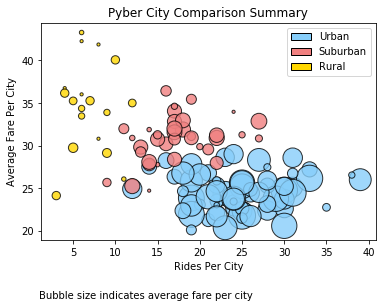

In [21]:
#build Legend Colors
legend_elements = [Patch(facecolor='lightskyblue', edgecolor='black',
                         label='Urban'), 
                  Patch(facecolor='lightcoral', edgecolor='black',
                         label='Suburban'),
                    Patch(facecolor='gold', edgecolor='black',
                         label='Rural')]

#Build scatter plot
plt.scatter(x=summary_table['ride count'], y=summary_table['fare'], s=summary_table['driver count scaled'], c=summary_table['type_colored'], edgecolors="black", alpha=0.8)
plt.title("Pyber City Comparison Summary")
plt.xlabel("Rides Per City")
plt.ylabel("Average Fare Per City")
plt.legend(handles=legend_elements, loc='best')
plt.text(1, 12, 'Bubble size indicates average fare per city')
plt.show()


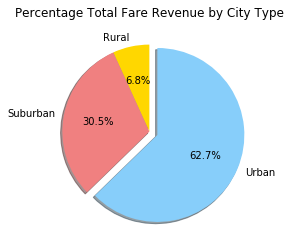

In [22]:
#percentage total fares by city type
pie_1 = pd.merge(ride_df,city_df, on='city', how='left')
pie_1 = pie_1.groupby(['city','type']).sum().reset_index()
pie_1 = pie_1.groupby('type').sum().reset_index()

#build pie
explode = (0, 0, 0.1)
colors = ["gold", "lightcoral", "lightskyblue"]
plt.title("Percentage Total Fare Revenue by City Type")
plt.pie(pie_1['fare'], labels=pie_1['type'], explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

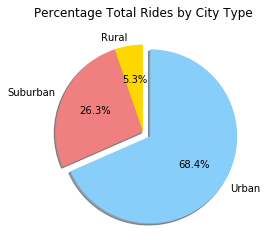

In [23]:
#percentage total riders by city type
pie_2 = pd.merge(ride_df,city_df, on='city', how='left')
pie_2 = pie_2['type'].value_counts().reset_index()
pie_2

#build pie
explode = (0.1, 0, 0)
colors = ["lightskyblue", "lightcoral", "gold"]
plt.title("Percentage Total Rides by City Type")
plt.pie(pie_2['type'], labels=pie_2['index'], counterclock= False, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

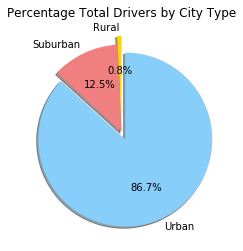

In [24]:
#percentage total drivers by city type
pie_3 = pd.merge(ride_df,city_df, on='city', how='left')
pie_3 = pie_3.groupby(['city','type']).sum().reset_index()
pie_3 = pie_3.groupby('type').sum().reset_index()
pie_3

#build pie
explode = (.1, 0, 0.1)
colors = ["gold", "lightcoral", "lightskyblue"]
plt.title("Percentage Total Drivers by City Type")
plt.pie(pie_3['driver_count'], labels=pie_3['type'], explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()